In [2]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.24.0-cp310-abi3-win_amd64.whl (430 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached grpcio-1.57.0-cp311-cp311-win_amd64.whl (4.3 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  U

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
W_true = 2
b_true = 0.5

x = tf.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

x = tf.cast(x, dtype="float32")
y = tf.cast(y, dtype="float32")

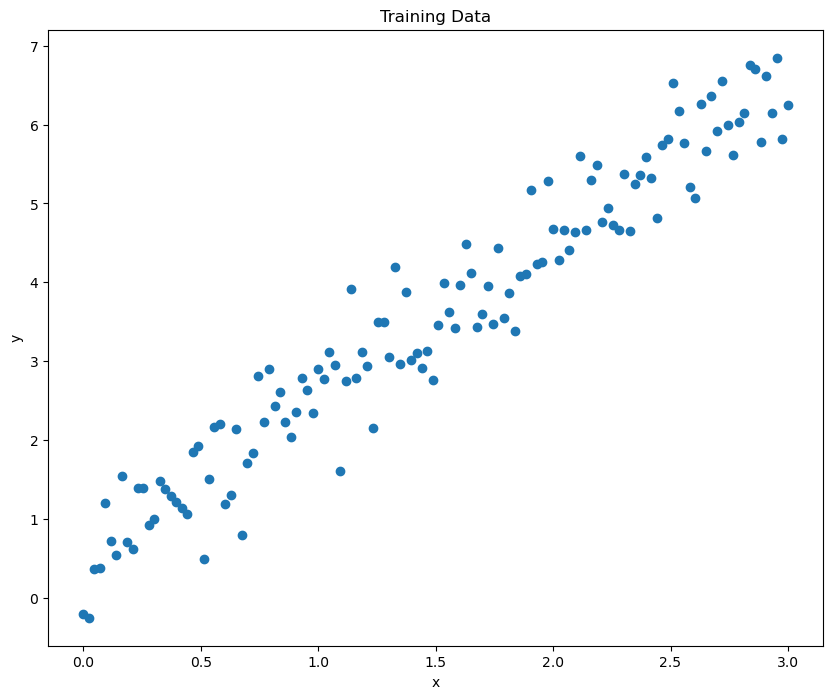

In [80]:
plt.figure(figsize=[10, 8])

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

plt.title("Training Data")

plt.show()

In [81]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn, name="w")
        self.bias = tf.Variable(np.random.randn, name="b")
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [82]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [83]:
def train(linear_model, x, y, lr=0.01):
    
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        
        current_loss = loss(y, y_pred)
        
    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)    

In [91]:
linear_model = LinearModel()

weight, bias = [], []

epochs = 100

lr = 0.15

In [92]:
for epoch_count in range(epochs):
    
    weight.append(linear_model.weight.numpy())
    bias.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr)
    
    print(f"epoch: {epoch_count}, Loss_value: {real_loss.numpy()}")

epoch: 0, Loss_value: 12.960511207580566
epoch: 1, Loss_value: 0.5030515193939209
epoch: 2, Loss_value: 0.24222712218761444
epoch: 3, Loss_value: 0.23320181667804718
epoch: 4, Loss_value: 0.2297895848751068
epoch: 5, Loss_value: 0.2268681526184082
epoch: 6, Loss_value: 0.22428840398788452
epoch: 7, Loss_value: 0.22200872004032135
epoch: 8, Loss_value: 0.21999412775039673
epoch: 9, Loss_value: 0.21821381151676178
epoch: 10, Loss_value: 0.21664053201675415
epoch: 11, Loss_value: 0.21525022387504578
epoch: 12, Loss_value: 0.21402159333229065
epoch: 13, Loss_value: 0.21293582022190094
epoch: 14, Loss_value: 0.21197634935379028
epoch: 15, Loss_value: 0.21112844347953796
epoch: 16, Loss_value: 0.21037910878658295
epoch: 17, Loss_value: 0.20971694588661194
epoch: 18, Loss_value: 0.20913177728652954
epoch: 19, Loss_value: 0.20861467719078064
epoch: 20, Loss_value: 0.20815767347812653
epoch: 21, Loss_value: 0.20775386691093445
epoch: 22, Loss_value: 0.2073969841003418
epoch: 23, Loss_value: 0.2

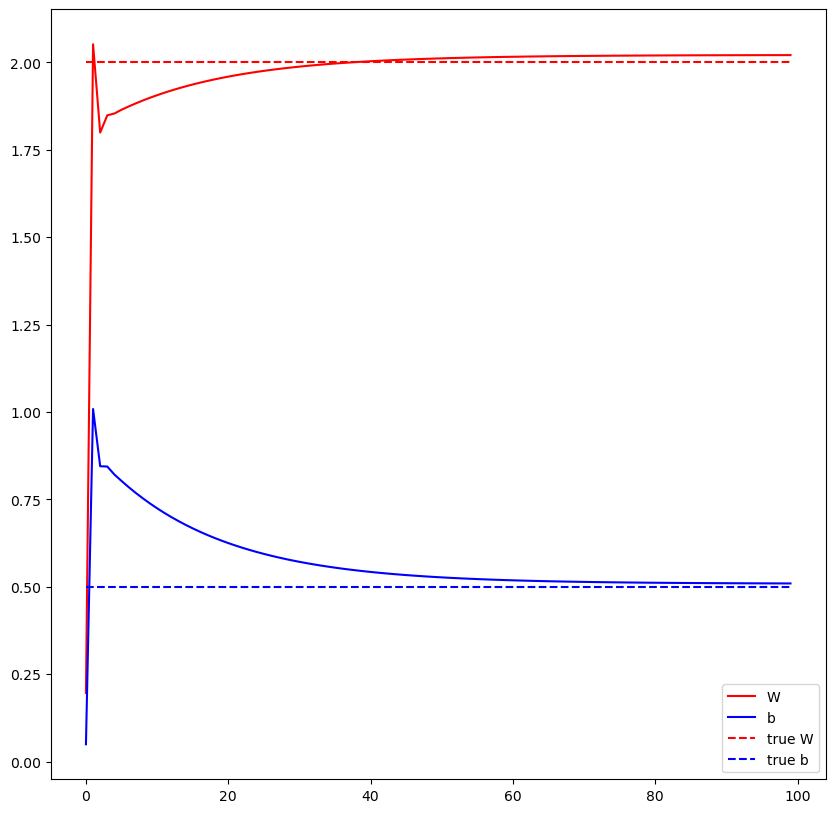

In [93]:
plt.figure(figsize=[10,10])

plt.plot(range(epochs), weight, "r", range(epochs), bias, "b")
plt.plot([W_true] * epochs, "r--", [b_true] * epochs, "b--")

plt.legend(["W", "b", "true W", "true b"])
plt.show()

In [94]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.0208209, 0.5094862)

In [95]:
mse = loss(y, linear_model(x))

mse.numpy()

0.20468521

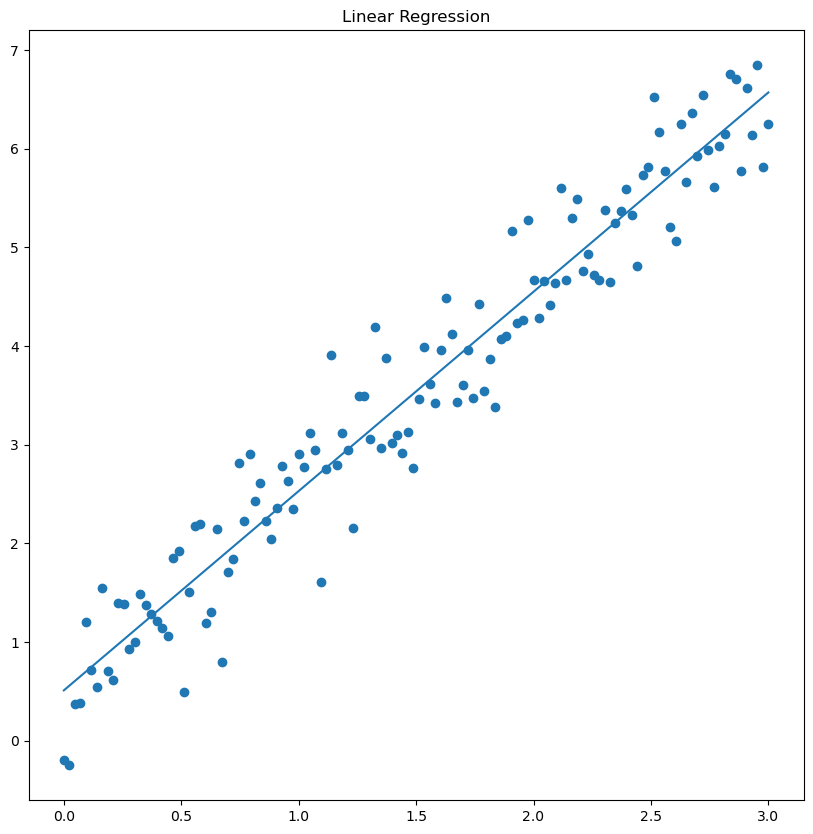

In [96]:
plt.figure(figsize=[10, 10])

plt.scatter(x, y, label="Original Data")
plt.plot(x, linear_model(x), label="Fitted Line")

plt.title("Linear Regression")
plt.show()

In [97]:
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
x = np.array(x)
y = np.array(y)

x.shape, y.shape

((130,), (130,))

In [103]:
x = pd.DataFrame(x, columns=["X"])
y = pd.DataFrame(y, columns=["Y"])

In [104]:
x

,X
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023
...,...
125,2.906977
126,2.930233
127,2.953488
128,2.976744


In [105]:
y

,Y
0,-0.201132
1,-0.249876
2,0.373269
3,0.378523
4,1.201118
...,...
125,6.613197
126,6.144899
127,6.847310
128,5.815668


In [116]:
input_shape = x.shape[1]

model = keras.Sequential([
    layers.Dense(1, input_shape=[input_shape], activation="linear")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="mse", metrics=["mse"])

In [117]:
model.fit(x, y, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 19.9668 - mse: 19.9668
Epoch 2/200
5/5 [==============================] - 0s 308us/step - loss: 7.3799 - mse: 7.3799
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 3.2561 - mse: 3.2561
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4869 - mse: 1.4869
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8153 - mse: 0.8153
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4899 - mse: 0.4899
Epoch 7/200
5/5 [==============================] - 0s 0s/step - loss: 0.3750 - mse: 0.3750
Epoch 8/200
5/5 [==============================] - 0s 679us/step - loss: 0.3019 - mse: 0.3019
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 0.2902 - mse: 0.2902
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.2828 - mse: 0.2828
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.

5/5 [==============================] - 0s 3ms/step - loss: 0.2079 - mse: 0.2079
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2088 - mse: 0.2088
Epoch 91/200
5/5 [==============================] - 0s 0s/step - loss: 0.2085 - mse: 0.2085
Epoch 92/200
5/5 [==============================] - 0s 1000us/step - loss: 0.2083 - mse: 0.2083
Epoch 93/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2084 - mse: 0.2084
Epoch 94/200
5/5 [==============================] - 0s 0s/step - loss: 0.2087 - mse: 0.2087
Epoch 95/200
5/5 [==============================] - 0s 874us/step - loss: 0.2084 - mse: 0.2084
Epoch 96/200
5/5 [==============================] - 0s 0s/step - loss: 0.2086 - mse: 0.2086
Epoch 97/200
5/5 [==============================] - 0s 104us/step - loss: 0.2073 - mse: 0.2073
Epoch 98/200
5/5 [==============================] - 0s 4ms/step - loss: 0.2075 - mse: 0.2075
Epoch 99/200
5/5 [==============================] - 0s 0s/step - loss: 0.2079 -

5/5 [==============================] - 0s 4ms/step


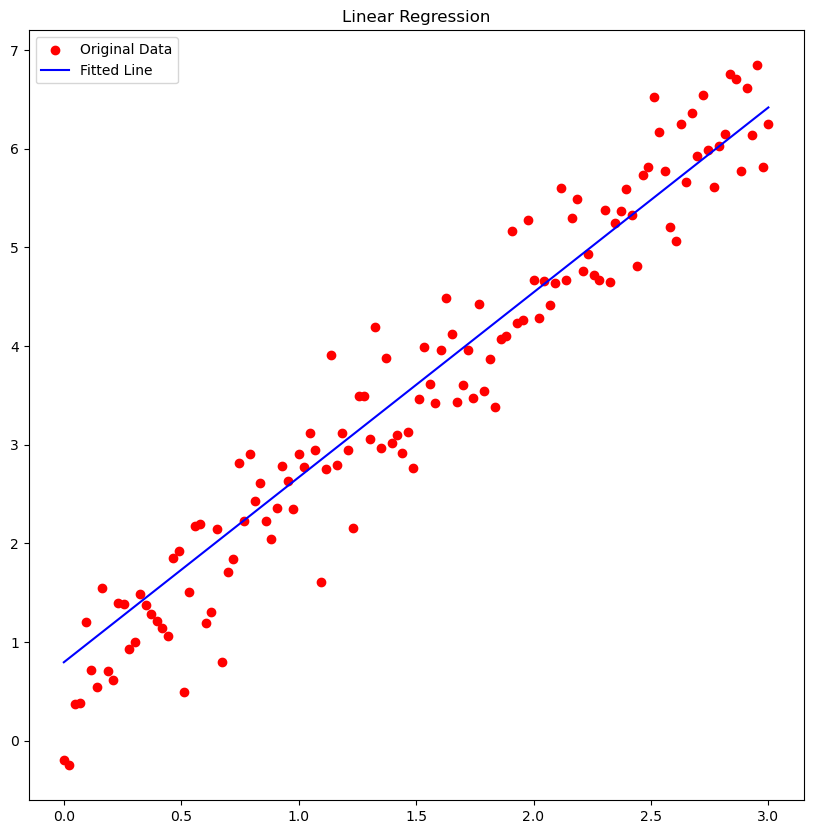

In [115]:
y_pred = model.predict(x)

plt.figure(figsize=[10, 10])

plt.scatter(x, y, c="r", label="Original Data")
plt.plot(x, y_pred, c="b", label="Fitted Line")

plt.legend()
plt.title("Linear Regression")

plt.show()